In [1]:
import pandas as pd
df = pd.read_excel('baza_github.xlsx',sheet_name='Arkusz1')
df.head()

,diet type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44
0,omnivore,25,0.12,1.13,24.84,7.33,0.14,0.21,0.24,0.03,...,2.34,0.52,0.09,0.04,0.09,28.92,0.13,0.05,0.10,0.386667
1,omnivore,22,0.06,1.04,29.45,7.67,0.14,0.18,0.23,0.03,...,2.71,0.84,0.16,0.05,0.07,28.99,0.14,0.08,0.14,0.280870
2,omnivore,25,0.10,1.21,28.92,7.62,0.17,0.23,0.26,0.03,...,2.57,1.06,0.18,0.05,0.07,25.48,0.16,0.09,0.13,0.300000
3,omnivore,21,0.06,0.73,23.84,7.18,0.17,0.25,0.30,0.03,...,5.10,0.81,0.09,0.07,0.19,37.83,0.11,0.07,0.28,0.102569
4,omnivore,21,0.08,0.86,21.88,7.67,0.16,0.23,0.31,0.04,...,4.17,0.75,0.11,0.07,0.12,37.89,0.16,0.05,0.19,0.249508


In [2]:
df.isnull().sum() / len(df)

diet type    0.0
feature1     0.0
feature2     0.0
feature3     0.0
feature4     0.0
feature5     0.0
feature6     0.0
feature7     0.0
feature8     0.0
feature9     0.0
feature10    0.0
feature11    0.0
feature12    0.0
feature13    0.0
feature14    0.0
feature15    0.0
feature16    0.0
feature17    0.0
feature18    0.0
feature19    0.0
feature20    0.0
feature21    0.0
feature22    0.0
feature23    0.0
feature24    0.0
feature25    0.0
feature26    0.0
feature27    0.0
feature28    0.0
feature29    0.0
feature30    0.0
feature31    0.0
feature32    0.0
feature33    0.0
feature34    0.0
feature35    0.0
feature36    0.0
feature37    0.0
feature38    0.0
feature39    0.0
feature40    0.0
feature41    0.0
feature42    0.0
feature43    0.0
feature44    0.0
dtype: float64

In [3]:
df['diet type'].value_counts()

omnivore    62
vegan       60
vegetari    56
pescoveg    26
Name: diet type, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

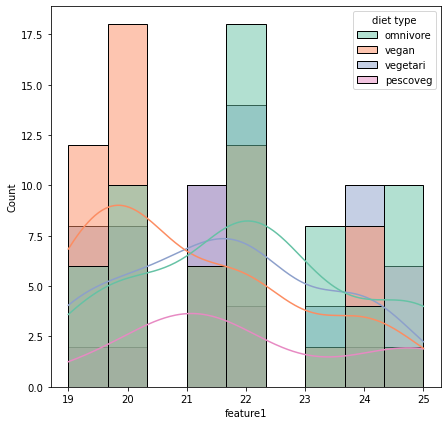

In [5]:
plt.rc('figure', figsize=(7,7))
fig,ax = plt.subplots()
sns.histplot(data=df,kde=True,x='feature1', hue='diet type',   
multiple='layer', palette='Set2', ax=ax);

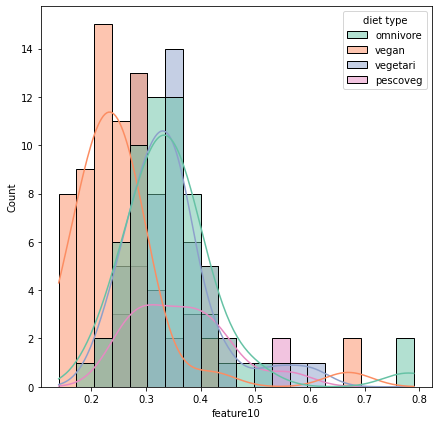

In [6]:
plt.rc('figure', figsize=(7,7))
fig,ax = plt.subplots()
sns.histplot(data=df,kde=True,x='feature10', hue='diet type',   
multiple='layer', palette='Set2', ax=ax);

In [7]:
dieta_1=df[df['diet type']=='omnivore']
dieta_2=df[df['diet type']=='pescoveg']
dieta_3=df[df['diet type']=='vegetari']
dieta_4=df[df['diet type']=="vegan"]

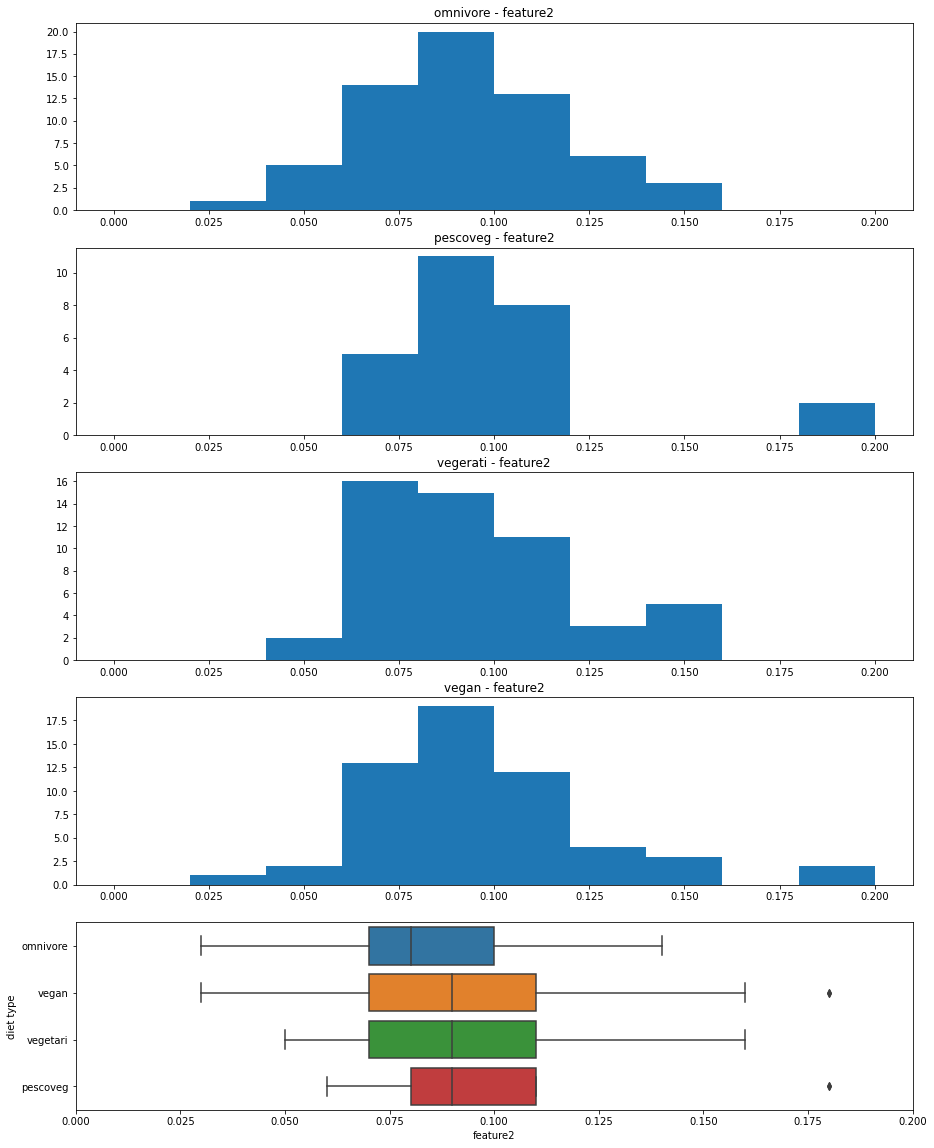

In [8]:
plt.rc('figure', figsize=(15, 20))
plt.subplot(5,1,1)
plt.title('omnivore - feature2')
plt.hist(dieta_1['feature2'],range=[0,0.2])

plt.subplot(5,1,2)
plt.title('pescoveg - feature2')
plt.hist(dieta_2['feature2'],range=[0,0.2])

plt.subplot(5,1,3)
plt.title('vegerati - feature2')
plt.hist(dieta_3['feature2'],range=[0,0.2])

plt.subplot(5,1,4)
plt.title('vegan - feature2')
plt.hist(dieta_4['feature2'],range=[0,0.2])

plt.subplot(5,1,5)
plt.xlim([0,0.2])
sns.boxplot(x="feature2", y="diet type", data=df,orient="h")

plt.show()

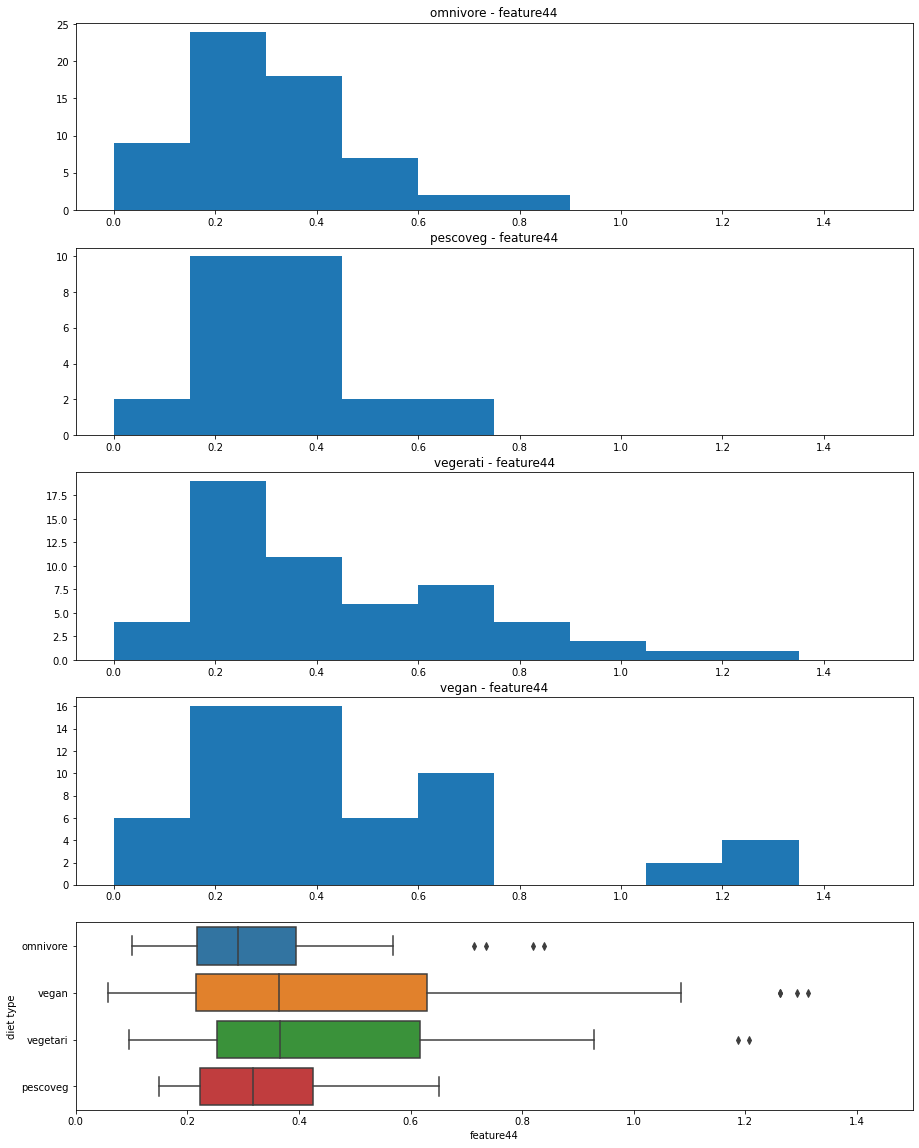

In [9]:
plt.rc('figure', figsize=(15, 20))
plt.subplot(5,1,1)
plt.title('omnivore - feature44')
plt.hist(dieta_1['feature44'],range=[0,1.5])

plt.subplot(5,1,2)
plt.title('pescoveg - feature44')
plt.hist(dieta_2['feature44'],range=[0,1.5])

plt.subplot(5,1,3)
plt.title('vegerati - feature44')
plt.hist(dieta_3['feature44'],range=[0,1.5])

plt.subplot(5,1,4)
plt.title('vegan - feature44')
plt.hist(dieta_4['feature44'],range=[0,1.5])

plt.subplot(5,1,5)
plt.xlim([0,1.5])
sns.boxplot(x="feature44", y="diet type", data=df,orient="h")

plt.show()

In [10]:
import scipy

pvalues = [
    scipy.stats.mannwhitneyu(dieta_1['feature44'], dieta_4['feature44'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_4['feature44'], dieta_3['feature44'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_2['feature44'], dieta_3['feature44'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_1['feature44'], dieta_3['feature44'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_2['feature44'], dieta_1['feature44'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_2['feature44'], dieta_4['feature44'], alternative="two-sided").pvalue
]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

omnivore vs. vegan: Custom statistical test, P_val:3.377e-02
vegan vs. vegetari: Custom statistical test, P_val:8.792e-01
vegetari vs. pescoveg: Custom statistical test, P_val:1.614e-01
omnivore vs. vegetari: Custom statistical test, P_val:2.377e-02
vegan vs. pescoveg: Custom statistical test, P_val:2.342e-01
omnivore vs. pescoveg: Custom statistical test, P_val:5.738e-01


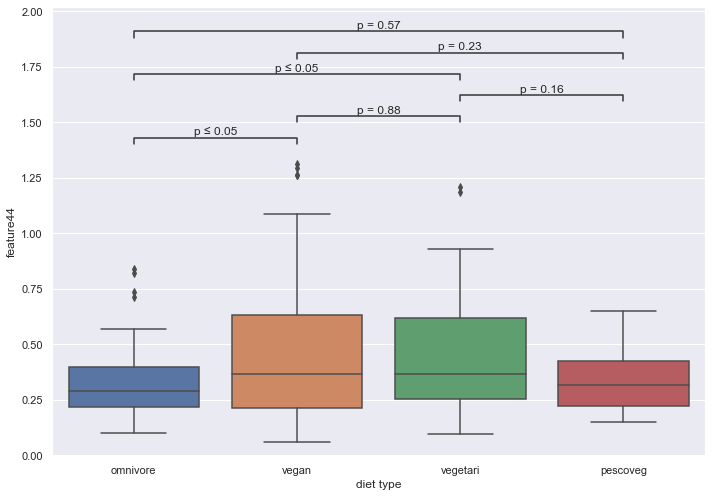

In [11]:
from statannotations.Annotator import Annotator
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
plotting_parameters = {
    'data':    df,
    'x':       'diet type',
    'y':       'feature44'
}

pairs = [('omnivore', 'vegan'),
         ('vegan', 'vegetari'),
         ('pescoveg', 'vegetari'),
        ('omnivore','vegetari'),
        ('pescoveg','omnivore'),
        ('pescoveg','vegan')]

with sns.plotting_context('notebook', font_scale = 1.4):

    # Plot with seaborn
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    ax=sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format="simple")
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.set_pvalues_and_annotate(pvalues)

    # Label and show
    plt.show()

omnivore vs. vegan: Custom statistical test, P_val:1.852e-07
vegan vs. vegetari: Custom statistical test, P_val:3.985e-05
vegetari vs. pescoveg: Custom statistical test, P_val:4.109e-01
omnivore vs. vegetari: Custom statistical test, P_val:4.111e-01
vegan vs. pescoveg: Custom statistical test, P_val:1.582e-05
omnivore vs. pescoveg: Custom statistical test, P_val:7.350e-01


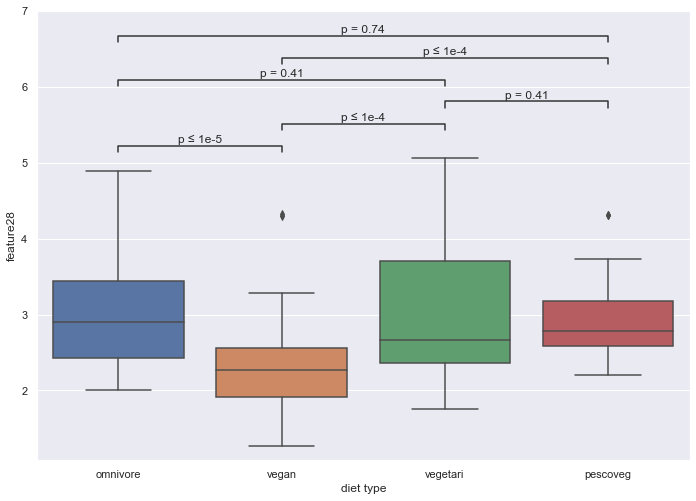

In [12]:
pvalues = [
    scipy.stats.mannwhitneyu(dieta_1['feature28'], dieta_4['feature28'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_4['feature28'], dieta_3['feature28'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_2['feature28'], dieta_3['feature28'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_1['feature28'], dieta_3['feature28'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_2['feature28'], dieta_1['feature28'], alternative="two-sided").pvalue,
    scipy.stats.mannwhitneyu(dieta_2['feature28'], dieta_4['feature28'], alternative="two-sided").pvalue
]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

from statannotations.Annotator import Annotator
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
plotting_parameters = {
    'data':    df,
    'x':       'diet type',
    'y':       'feature28'
}

pairs = [('omnivore', 'vegan'),
         ('vegan', 'vegetari'),
         ('pescoveg', 'vegetari'),
        ('omnivore','vegetari'),
        ('pescoveg','omnivore'),
        ('pescoveg','vegan')]

with sns.plotting_context('notebook', font_scale = 1.4):

    # Plot with seaborn
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    ax=sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format="simple")
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.set_pvalues_and_annotate(pvalues)

    # Label and show
    plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
x = df.drop('diet type', axis = 1)
y= pd.DataFrame(df['diet type'])


#x = df2.loc[:, features].values

#y = df2.loc[:,['dieta']].values
# Standardizing the features
features_scaled = StandardScaler().fit_transform(x)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
finalDf = pd.concat([principalDf, df[['diet type']]], axis = 1)

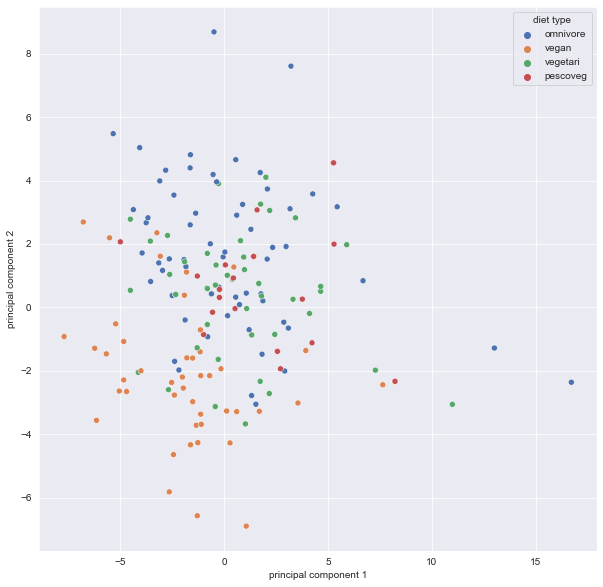

In [19]:
fig = plt.figure(figsize = (10,10))
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(x="principal component 1", y="principal component 2", data=finalDf, hue='diet type');

In [20]:
finalDf

,principal component 1,principal component 2,diet type
0,-2.425219,3.540444,omnivore
1,-2.822945,4.326114,omnivore
2,-0.539441,4.188930,omnivore
3,-1.940457,1.506517,omnivore
4,-0.618599,0.425723,omnivore
...,...,...,...
199,-1.803446,-1.592634,vegan
200,-0.565775,-0.152496,pescoveg
201,0.277012,-4.273757,vegan
202,-0.232185,0.566336,pescoveg


In [24]:
def diet_type(row):
    if (row['diet type'] == 'omnivore'):
        return 0
    elif (row['diet type'] == 'pescoveg'):
        return 1
    elif (row['diet type'] == 'vegetari'):
        return 2
    else:
        return 3
    

df['diet type'] = df.apply(diet_type, axis=1)
df.sample(5)

,diet type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44
34,3,22,0.08,1.13,24.67,7.04,0.18,0.13,0.17,0.03,...,2.17,0.58,0.14,0.03,0.08,26.35,0.21,0.05,0.20,1.292727
78,3,19,0.10,0.78,17.98,8.02,0.27,0.41,0.49,0.07,...,1.36,0.73,0.18,0.05,0.08,34.74,0.15,0.06,0.09,0.189254
146,1,25,0.08,0.92,21.09,8.28,0.24,0.30,0.29,0.06,...,2.95,0.66,0.13,0.05,0.09,36.70,0.14,0.06,0.25,0.327671
186,1,21,0.11,0.92,23.71,7.87,0.24,0.31,0.34,0.05,...,2.35,0.78,0.11,0.05,0.07,37.87,0.17,0.05,0.16,0.222796
24,0,23,0.09,0.98,22.77,7.22,0.15,0.20,0.25,0.03,...,2.97,0.76,0.17,0.06,0.09,37.46,0.09,0.04,0.18,0.126061


In [26]:
from sklearn.model_selection import train_test_split
dane = df.drop('diet type', axis = 1)
dieta = pd.DataFrame(df['diet type'])

X_train, X_test, Y_train, Y_test = train_test_split(dane, dieta, test_size=0.2, random_state=123)

In [33]:
# Klasyfikator las losowy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train.values.ravel())
Y_pred = random_forest.predict(X_test)
print('Accuracy:', accuracy_score(Y_pred, Y_test))

Accuracy: 0.8780487804878049


In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[12  0  0  0]
 [ 0  2  1  0]
 [ 1  0 12  2]
 [ 0  1  0 10]]


In [36]:
##

In [38]:
finalDf['diet type'] = finalDf.apply(diet_type, axis=1)
finalDf.sample(5)

,principal component 1,principal component 2,diet type
112,2.076777,3.733189,0
48,-6.154702,-3.562563,3
21,-3.156219,1.401944,0
194,1.412785,1.607442,1
172,-1.521581,-2.974356,3


In [39]:
dane = finalDf.drop('diet type', axis = 1)
dieta = pd.DataFrame(finalDf['diet type'])

X_train, X_test, Y_train, Y_test = train_test_split(dane, dieta, test_size=0.2, random_state=123)

In [40]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train.values.ravel())
Y_pred = random_forest.predict(X_test)
print('Accuracy:', accuracy_score(Y_pred, Y_test))

Accuracy: 0.4634146341463415


In [41]:
print(confusion_matrix(Y_test, Y_pred))

[[4 1 6 1]
 [1 2 0 0]
 [6 2 5 2]
 [0 0 3 8]]


In [58]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2','principal component 3','principal component 4'
                         ,'principal component 5','principal component 6'])

In [59]:
finalDf = pd.concat([principalDf, df[['diet type']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,diet type
0,-2.425219,3.540444,3.404884,-1.009492,-1.462048,-0.225721,0
1,-2.822945,4.326114,2.056005,-1.486423,-1.016131,0.222869,0
2,-0.539441,4.188930,2.732997,-1.528441,0.871334,-1.647230,0
3,-1.940457,1.506517,-3.043851,-2.638996,-3.085730,0.346321,0
4,-0.618599,0.425723,-1.241676,-1.409686,-4.001787,2.330078,0


In [60]:
dane = finalDf.drop('diet type', axis = 1)
dieta = pd.DataFrame(finalDf['diet type'])

X_train, X_test, Y_train, Y_test = train_test_split(dane, dieta, test_size=0.2, random_state=123)

In [61]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train.values.ravel())
Y_pred = random_forest.predict(X_test)
print('Accuracy:', accuracy_score(Y_pred, Y_test))

Accuracy: 0.7560975609756098


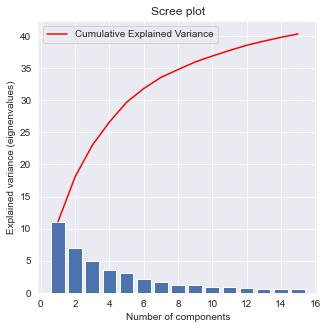

In [67]:
fig = plt.figure(figsize = (5,5))
pca = PCA(n_components=15)

reduced_features = pca.fit_transform(features_scaled)
 
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

In [70]:
pca = PCA(n_components=2)

reduced_features = pca.fit_transform(features_scaled)

# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = ['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10','feature11','feature12',
 'feature13','feature14','feature15','feature16','feature17','feature18','feature19','feature20','feature21','feature22','feature23',
 'feature24','feature25','feature26','feature27','feature28','feature29','feature30','feature31','feature32','feature33','feature34',
 'feature35','feature36','feature37','feature38','feature39','feature40','feature41','feature42','feature43','feature44']
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df.head()

,PC1,PC2
feature_names,,
feature1,0.009096,0.097696
feature2,0.023282,0.058157
feature3,0.105890,0.196853
feature4,0.060768,0.254848
feature5,0.056374,-0.039156


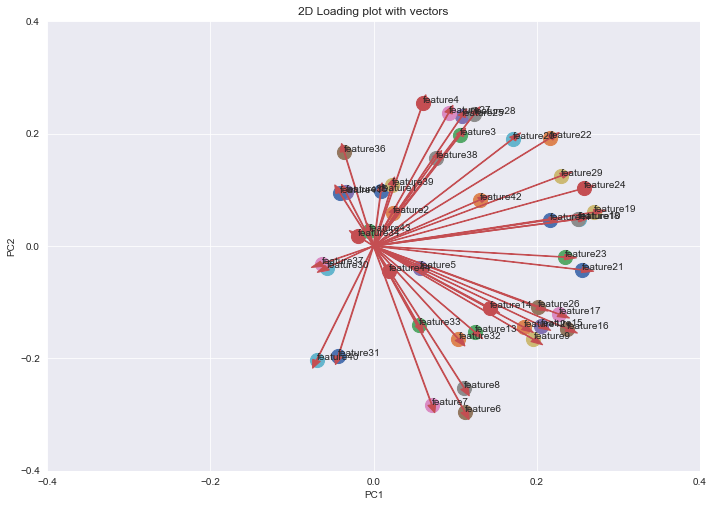

In [72]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 

xticks = np.linspace(-0.4, 0.4, num=5)
yticks = np.linspace(-0.4, 0.4, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()